In [1]:
import numpy as np

# function to initialize weights and biases
# input -> array with number of neurons in each layer
def initialize_parameters(layer_sizes):
  parameters = {}
  num_of_layers = len(layer_sizes)

  for i in range(1, num_of_layers):
    parameters[f'W{i}'] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
    parameters[f'b{i}'] = np.zeros((layer_sizes[i], 1))

  return parameters

# testing
# parameters = initialize_parameters([784, 128, 10])



Function to calculate the output of the network for a given input X.

Function Parameters:
1. X: input data (`input_size x m`), where `m` is the number of the data
2. parameters: Dictionary containing weights and biases.
3. activation: List of activation funcion for each layer.

Output: `output_size x m` matrix.

In [2]:
def sigmoid(Z):
  return 1 / (1 + np.exp(-Z))

def softmax(Z):
  expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # to prevent overflow
  return expZ / np.sum(expZ, axis=0, keepdims=True)

def relu(Z):
  return np.maximum(0, Z)


def forward_propagation(X, parameters, activations):
  A = X
  caches = []
  num_layers = len(activations)

  for i in range(1, num_layers + 1):
    W = parameters[f'W{i}']
    b = parameters[f'b{i}']
    Z = np.dot(W,A) + b

    if(activations[i-1] == "sigmoid"):
      A = sigmoid(Z)
    elif(activations[i-1] == "relu"):
      A = relu(Z)
    elif(activations[i-1] == "softmax"):
      A = softmax(Z)

    caches.append({"Z":Z, "A":A, "W":W, "b": b})

  return A, caches

#tesing
# X = np.random.randn(784, 5)  # Example input with 5 samples
# activations = ["sigmoid", "softmax"]
# A, caches = forward_propagation(X, parameters, activations)
# print(A.shape)  # Should output: (10, 5)
# print(A)



In [3]:
# function to compute cross-entropy loss
# y -> True Lable, A-> Predicted label
def compute_loss(y,A):
  m = y.shape[1]
  loss = -np.sum(y*np.log(A))/m
  return loss


#testing
# y = np.eye(10)[:, :5]  #example one-hot encoded labels for 5 input
# loss = compute_loss(y,A)
# print(loss)

In [9]:
def sigmoid_derivative(A):
  return A * (1 - A)

def relu_derivative(A):
  return (A > 0).astype(float)

# Back Propagation
def back_propagation(X, y, caches, activations):
  grads = {}
  m = X.shape[1]
  num_layers = len(caches)

  # Computing gradients for the output layer
  A_last = caches[-1]["A"]
  dA = A_last - y

  for i in reversed(range(num_layers)):
    Z, A, W, b = caches[i]["Z"], caches[i]["A"], caches[i]["W"], caches[i]["b"]
    if(activations[i] == "sigmoid"):
      dZ = dA * sigmoid_derivative(A)
    elif(activations[i] == "relu"):
      dZ = dA * relu_derivative(A)
    elif(activations[i] == "softmax"):
      dZ = dA

    dW = np.dot(dZ, caches[i-1]["A"].T) / m if i > 0 else np.dot(dZ, X.T)/m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA = np.dot(W.T, dZ) if i > 0 else None

    grads[f'dW{i+1}'] = dW
    grads[f'db{i+1}'] = db

  return grads

# testing
# grads = back_propagation(X, y, parameters, caches, activations)
# print(grads.keys())



In [10]:
def update_parameters(parameters, grads, learning_rate):
  num_layers = len(parameters) // 2

  for i in range(1,num_layers + 1):

    # print(f"Layer {i}: W{i} shape {parameters[f'W{i}'].shape}, dW{i} shape {grads[f'dW{i}'].shape}")  # Debugging
    # print(f"Layer {i}: b{i} shape {parameters[f'b{i}'].shape}, db{i} shape {grads[f'db{i}'].shape}")  # Debugging

    #grads[f'dW{i}'] = grads[f'dW{i}'].T
    parameters[f'W{i}'] -= learning_rate * grads[f'dW{i}']
    parameters[f'b{i}'] -= learning_rate * grads[f'db{i}']

  return parameters

# testing
# updated_parameters = update_parameters(parameters, grads, 0.01)
# print(updated_parameters.keys())


In [11]:
import matplotlib.pyplot as plt

def compute_accuracy(y_true, A_pred):
  y_pred = np.argmax(A_pred, axis=0)
  y_true_labels = np.argmax(y_true, axis=0)
  accuracy = np.mean(y_pred == y_true_labels)*100  # Accuracy in percentage
  return accuracy


def train_neural_network(X_train, y_train, layer_sizes, activations, num_epochs=100, learning_rate=0.01):
  loss_history = []
  accuracy_history = []
  parameters = initialize_parameters(layer_sizes)
  for epoch in range(num_epochs):
    # Forward propogation
    A, caches = forward_propagation(X_train, parameters, activations)

    # Compute loss
    loss = compute_loss(y_train, A)
    loss_history.append(loss)

    # Compute accuracy
    accuracy = compute_accuracy(y_train, A)
    accuracy_history.append(accuracy)

    # Backward propagation
    grads = back_propagation(X_train, y_train, caches, activations)

    # Update parameters
    parameters = update_parameters(parameters, grads, learning_rate)

    # Print loss and accuracy every 10 epochs
    if(epoch % 10 == 0):
      print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

  # Plot loss and accuracy curves
  plt.figure(figsize=(12,5))

  # Loss curve
  plt.subplot(1, 2, 1)
  plt.plot(range(num_epochs), loss_history, label="Loss", color="red")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend()

  # Accuracy Curve
  plt.subplot(1, 2, 2)
  plt.plot(range(num_epochs), accuracy_history, label="Accuracy", color="blue")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy (%)")
  plt.title("Accuracy Curve")
  plt.legend()

  plt.show()

  return parameters



In [12]:
def evaluate_model(X_test, y_test, parameters, activations):

  # Forward propogation on the test data
  A, _ = forward_propagation(X_test, parameters, activations)

  # Compute accuracy
  accuracy = compute_accuracy(y_test, A)

  print(f"Test Accuracy: {accuracy:.2f}%")

  return accuracy,A

Epoch 0, Loss: 2.3029, Accuracy: 13.59%
Epoch 10, Loss: 2.3019, Accuracy: 15.92%
Epoch 20, Loss: 2.3008, Accuracy: 19.06%
Epoch 30, Loss: 2.2997, Accuracy: 22.75%
Epoch 40, Loss: 2.2985, Accuracy: 26.29%
Epoch 50, Loss: 2.2974, Accuracy: 29.48%
Epoch 60, Loss: 2.2962, Accuracy: 32.25%
Epoch 70, Loss: 2.2949, Accuracy: 34.71%
Epoch 80, Loss: 2.2935, Accuracy: 36.95%
Epoch 90, Loss: 2.2921, Accuracy: 38.66%
Epoch 100, Loss: 2.2906, Accuracy: 40.16%
Epoch 110, Loss: 2.2889, Accuracy: 41.37%
Epoch 120, Loss: 2.2872, Accuracy: 42.35%
Epoch 130, Loss: 2.2853, Accuracy: 43.09%
Epoch 140, Loss: 2.2833, Accuracy: 43.62%
Epoch 150, Loss: 2.2811, Accuracy: 44.09%
Epoch 160, Loss: 2.2787, Accuracy: 44.39%
Epoch 170, Loss: 2.2762, Accuracy: 44.66%
Epoch 180, Loss: 2.2734, Accuracy: 44.84%
Epoch 190, Loss: 2.2704, Accuracy: 44.97%


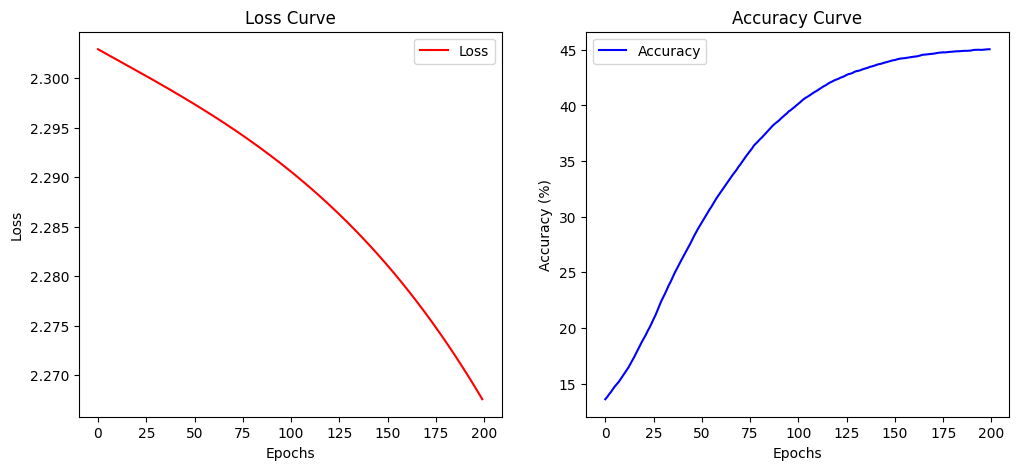

Test Accuracy: 45.16%


In [13]:
import tensorflow as tf

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten
X_train = X_train.reshape(X_train.shape[0], -1)/255.0
X_test = X_test.reshape(X_test.shape[0], -1)/255.0

# One-hot encoding for labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

layer_sizes = [784, 128, 10]
activations = ["relu", "softmax"]
parameters = train_neural_network(X_train, y_train, layer_sizes,activations, 200, 0.01)
accuracy,A = evaluate_model(X_test, y_test, parameters, activations)



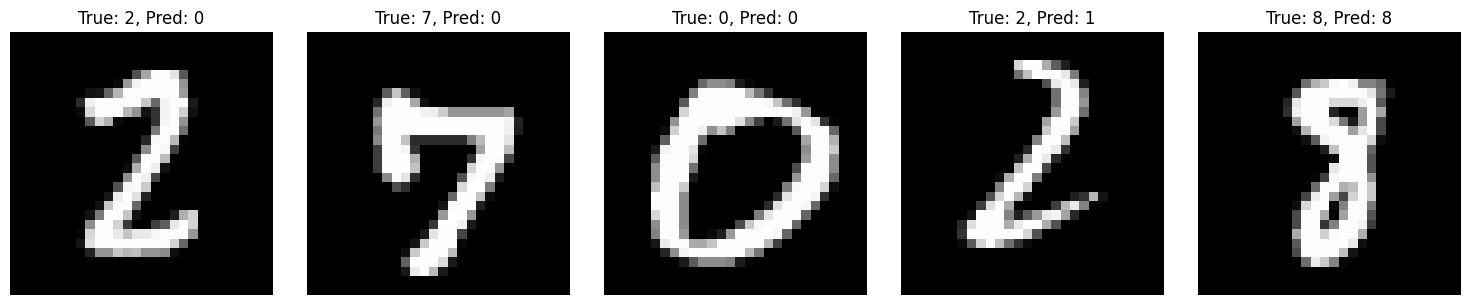

In [15]:
# Some random predction
sample_size = 5
sample_indices = np.random.choice(X_test.shape[1], size=sample_size, replace=False)
sample_images = X_test[:,sample_indices]
sample_lables = np.argmax(y_test[:,sample_indices], axis=0)
sample_predictions = np.argmax(A[:,sample_indices], axis=0)

plt.figure(figsize=(15, 3))
for i in range(sample_size):
  plt.subplot(1, sample_size, i+1)
  plt.imshow(sample_images[:,i].reshape(28,28), cmap='gray')
  plt.title(f"True: {sample_lables[i]}, Pred: {sample_predictions[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

When using activations = ['sigmoid', 'softmax'], the accuracy achieved within 200 epochs was around 11%. However, when ReLU was used instead of sigmoid, the accuracy improved to around 45%.

My observation: ReLU leads to faster training and helps mitigate the vanishing gradient problem.